In [924]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Questions for understanding each dataset

• What are the average stats for players in the top 5 conferences?

• Are there differences in stats across conferences (e.g., average points, assists)?

• How many players transitioned to the NBA from each conference?

In [925]:
acc_df = pd.read_csv('acc_career_avg_.csv', index_col= 0)[['player', 'pts', 'ast', 'trb']]
big_12_df = pd.read_csv('big_12_career_avg.csv', index_col= 0)[['player', 'pts', 'ast', 'trb']]
pac_10_df = pd.read_csv('pac_10_career_avg.csv', index_col= 0)[['player', 'pts', 'ast', 'trb']]
pac_12_df = pd.read_csv('pac_12_career_avg.csv', index_col= 0)[['player', 'pts', 'ast', 'trb']]
sec_df = pd.read_csv('sec_career_avg_.csv', index_col= 0)[['player', 'pts', 'ast', 'trb']]
big_10_df = pd.read_csv('big_10_career_avg_.csv', index_col= 0)[['player', 'pts', 'ast', 'trb']]

In [926]:
# concatenating these two dfs since they're part of the same conference, just different names
pac_12_df_abs = pd.concat([pac_12_df, pac_10_df])

In [927]:
"""
want to concatenate each college df into one big dataframe so I can compare 
it to the NBA dataframe so I'm adding conference labels to each player in the dataframes
"""

acc_label_df = acc_df
acc_label_df['conference'] = 'ACC'

big_10_label_df = big_10_df
big_10_label_df['conference'] = 'Big 10'

big_12_label_df = big_12_df
big_12_label_df['conference'] = 'Big 12'

pac_12_abs_label_df = pac_12_df_abs
pac_12_df_abs['conference'] = 'PAC-12'

sec_label_df = sec_df
sec_label_df['conference'] = 'SEC'

In [928]:
NBA_career_avg_df = pd.read_csv('NBA_career_averages.csv', index_col= 0)

In [929]:
college_career_avg_df = acc_label_df
college_career_avg_df= pd.concat([college_career_avg_df, big_10_label_df])
college_career_avg_df= pd.concat([college_career_avg_df, big_12_label_df])
college_career_avg_df= pd.concat([college_career_avg_df, pac_12_abs_label_df])
college_career_avg_df= pd.concat([college_career_avg_df, sec_label_df])

In [930]:
summary_stats_all_colleges_2 = college_career_avg_df.groupby('conference')[['pts', 'ast', 'trb']].mean().reset_index()

In [931]:
summary_stats_all_colleges_2

,conference,pts,ast,trb
0,ACC,9.450163,1.789009,4.062359
1,Big 10,9.102105,1.797980,3.903300
2,Big 12,9.360966,1.848551,4.035944
3,PAC-12,9.328380,1.805636,3.973815
4,SEC,9.379231,1.736237,4.005633


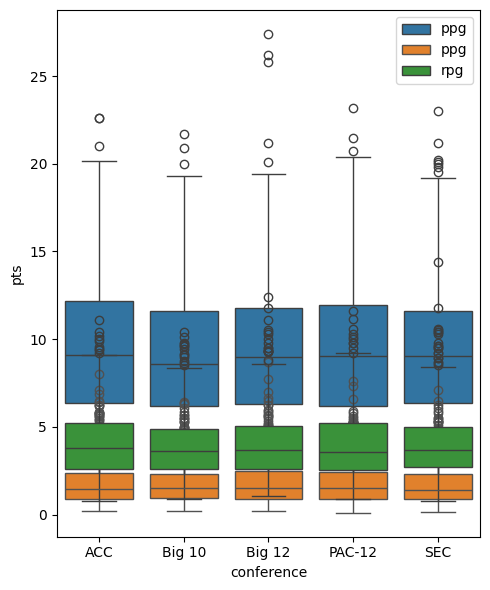

In [932]:
import seaborn as sns

plt.figure(figsize=(5, 6)).set_facecolor('white')


sns.boxplot(x='conference', y='pts', data=college_career_avg_df, label = 'ppg')
sns.boxplot(x='conference', y='ast', data=college_career_avg_df, label = 'ppg')
sns.boxplot(x='conference', y='trb', data=college_career_avg_df, label = 'rpg')
plt.legend()

plt.tight_layout()
plt.show()

It's quite interesting to see that there's not much of a substantial difference in statistics for each conference. As in there's almost no change between any stats. Each conference seems to all average out to about (9 ppg, 2 apg, 4rpg). There isn't much of a difference in five-number summary between any of the conferences either. Although these are the top 5 conferences in the NCAA, perhaps there may be a bigger difference to see when these averages are compared to lower regarded conferences. 

It is also interesting to see that each conference prioritizes scoring over any other facet of the game. 

#### Quick summary:


• No big difference in statistics between each conference

• Could be bigger difference when compared to worse conferences in NCAA

• All 5 conferences have a tendency to score over assist and rebound

In [933]:
NBA_career_avg_df = NBA_career_avg_df[['player', 'pts', 'ast', 'trb', 'mp', 'g']]

In [934]:
"""
the isin method will return me a dataframe of booleans that says if a player 
from the college dataframe is in the nba dataframe

this way I can merge the 'player' column from the college data and see 2 things:

1) which players in the college data made it to the NBA?

2) which conference is each player in? 
"""

is_in_NBA_df = college_career_avg_df['player'].isin(NBA_career_avg_df['player']).to_frame()
is_in_NBA_df.columns = ['in_nba']

In [935]:
is_in_NBA_df = pd.concat([college_career_avg_df[['player', 'conference']], is_in_NBA_df], axis = 1)

In [936]:
college_career_avg_df

,player,pts,ast,trb,conference
0,Zion Williamson,22.60,2.10,8.90,ACC
1,R.J. Barrett,22.60,4.30,7.60,ACC
2,Marvin Bagley III,21.00,1.50,11.10,ACC
3,Tyler Hansbrough,20.15,1.10,8.50,ACC
4,J.J. Redick,19.88,2.20,2.72,ACC
...,...,...,...,...,...
1103,Darius Thompson,2.50,2.40,2.00,SEC
1128,Kevin Brophy,2.35,1.35,1.10,SEC
1163,John Florveus,2.15,0.30,2.50,SEC
1225,Oliver Black,1.80,0.30,2.40,SEC


In [937]:
"""
I see a problem here, it's saying R.J. Barrett and J.J. Reddick aren't in the NBA. 
I know this is wrong since RJ and JJ are notable players that
had good college careers. 
"""
is_in_NBA_df


,player,conference,in_nba
0,Zion Williamson,ACC,True
1,R.J. Barrett,ACC,False
2,Marvin Bagley III,ACC,True
3,Tyler Hansbrough,ACC,True
4,J.J. Redick,ACC,False
...,...,...,...
1103,Darius Thompson,SEC,False
1128,Kevin Brophy,SEC,False
1163,John Florveus,SEC,False
1225,Oliver Black,SEC,False


In [938]:
NBA_career_avg_df[NBA_career_avg_df['player'] =='JJ Redick']

,player,pts,ast,trb,mp,g
240,JJ Redick,11.73,1.96,1.89,23.96,55.89


In [939]:
NBA_career_avg_df[NBA_career_avg_df['player'] =='RJ Barrett']

,player,pts,ast,trb,mp,g
58,RJ Barrett,17.88,2.85,5.4,33.42,67.75


I can see that the way people who have a first name that contain mere initials are spelled differently between datasets. RJ Barrett and JJ Redick on the NBA dataset are R.J. Barett and J.J. Redick on the college dataset. I'm going to try and account for every possibility of that happening and standardize their names. 

In [940]:
"""
First I'll strip the whitespace out of all player names

Then I'm replacing all instances of a period with a blank
"""
NBA_career_avg_df['player'] = NBA_career_avg_df['player'].str.strip()
college_career_avg_df['player'] = college_career_avg_df['player'].str.strip()
NBA_career_avg_df['player'] = NBA_career_avg_df['player'].str.replace('.', '')
college_career_avg_df['player'] = college_career_avg_df['player'].str.replace('.', '')

/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_7918/2778178593.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  NBA_career_avg_df['player'] = NBA_career_avg_df['player'].str.replace('.', '')
/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_7918/2778178593.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  college_career_avg_df['player'] = college_career_avg_df['player'].str.replace('.', '')


In [941]:
is_in_NBA_df = college_career_avg_df['player'].isin(NBA_career_avg_df['player']).to_frame()
is_in_NBA_df.columns = ['in_nba']
is_in_NBA_df = pd.concat([college_career_avg_df[['player', 'conference']], is_in_NBA_df], axis = 1)

In [942]:
# Now I can see that RJ and JJ are correctly standardized and classified
is_in_NBA_df

,player,conference,in_nba
0,Zion Williamson,ACC,True
1,RJ Barrett,ACC,True
2,Marvin Bagley III,ACC,True
3,Tyler Hansbrough,ACC,True
4,JJ Redick,ACC,True
...,...,...,...
1103,Darius Thompson,SEC,False
1128,Kevin Brophy,SEC,False
1163,John Florveus,SEC,False
1225,Oliver Black,SEC,False


In [943]:
players_per_conference_df = is_in_NBA_df.groupby('conference')['in_nba'].sum().to_frame().reset_index()

In [944]:
players_per_conference_df

,conference,in_nba
0,ACC,213
1,Big 10,122
2,Big 12,138
3,PAC-12,168
4,SEC,196


In [945]:
players_per_conference_df['in_nba'][0]

213

In [946]:
l = [players_per_conference_df['in_nba'][0]/len(acc_df),
players_per_conference_df['in_nba'][1]/len(big_10_df),
players_per_conference_df['in_nba'][2]/len(big_12_df),
players_per_conference_df['in_nba'][3]/len(pac_12_df_abs),
players_per_conference_df['in_nba'][4]/len(sec_df)]

total_players = [len(acc_df), len(big_10_df), len(big_12_df), len(pac_12_df_abs), len(sec_df)]

In [947]:
players_per_conference_df['total_players'] = total_players
players_per_conference_df['%'] = l
players_per_conference_df['%'] = players_per_conference_df['%'] * 100
players_per_conference_df['%'] = players_per_conference_df['%'].round(3)

In [948]:
players_per_conference_df

,conference,in_nba,total_players,%
0,ACC,213,797,26.725
1,Big 10,122,703,17.354
2,Big 12,138,683,20.205
3,PAC-12,168,747,22.490
4,SEC,196,845,23.195


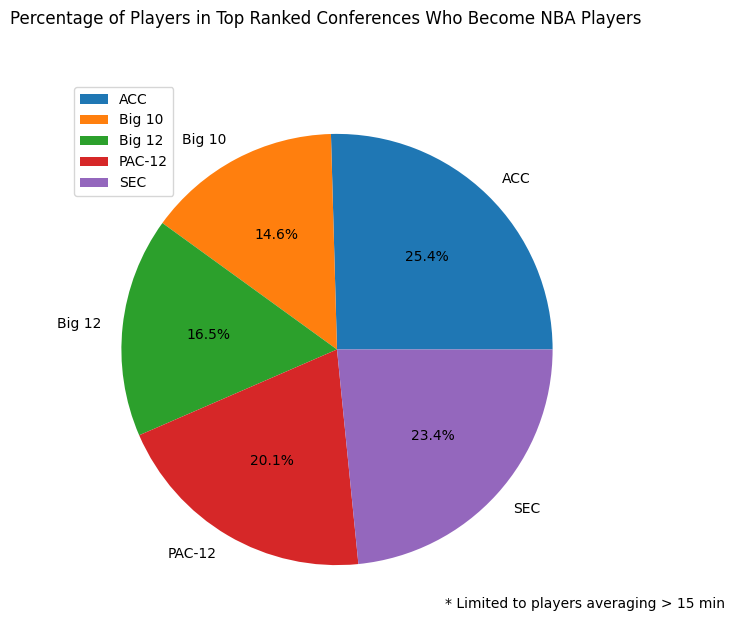

In [949]:
# plotting graph

plt.style.use('default')
palette_color = sns.color_palette('bright')
players_per_conference_df.plot.pie(y = 'in_nba', labels = players_per_conference_df['conference'], autopct = '%1.1f%%', ylabel='', figsize=(9, 7))
plt.suptitle('Percentage of Players in Top Ranked Conferences Who Become NBA Players')
plt.annotate("* Limited to players averaging > 15 min",  xytext=(.5, -1.2), xy = (0,0))

plt.show()

It looks like the PAC-12, SEC, and the ACC are the top 3 conferences in terms of players that get into the professional league. 

I spot a slight correlation with player count and players making it to the NBA. 

## Additional Questions:

• For players from the top 5 conferences, is there a correlation between PPG, APG, or RPG and the likelihood of making it to the NBA?

• Which stat (PPG, APG, or RPG) is the strongest indicator of transitioning to the NBA?

In [950]:
is_in_NBA_df = pd.concat([college_career_avg_df, is_in_NBA_df['in_nba']], axis=1)

In [951]:
is_in_NBA_df['in_nba'] = is_in_NBA_df['in_nba'].map({True: 1, False: 0})

In [952]:
is_in_NBA_df

,player,pts,ast,trb,conference,in_nba
0,Zion Williamson,22.60,2.10,8.90,ACC,1
1,RJ Barrett,22.60,4.30,7.60,ACC,1
2,Marvin Bagley III,21.00,1.50,11.10,ACC,1
3,Tyler Hansbrough,20.15,1.10,8.50,ACC,1
4,JJ Redick,19.88,2.20,2.72,ACC,1
...,...,...,...,...,...,...
1103,Darius Thompson,2.50,2.40,2.00,SEC,0
1128,Kevin Brophy,2.35,1.35,1.10,SEC,0
1163,John Florveus,2.15,0.30,2.50,SEC,0
1225,Oliver Black,1.80,0.30,2.40,SEC,0


A point-biserial correlation is a statistical measurement that determines the strength and direction of the relationship between a continuous variable and a dichotomous variable. 

In [953]:
from scipy import stats

In [954]:
is_in_NBA_df[['pts', 'ast', 'trb']].corrwith(is_in_NBA_df['in_nba'], method = stats.pointbiserialr)

,pts,ast,trb
0,4.007977e-01,1.573437e-01,3.194519e-01
1,1.095581e-145,2.363902e-22,2.622781e-90


/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_7918/3592275565.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(is_in_NBA_df.corr(), annot = True, cmap = 'Oranges')


<Axes: >

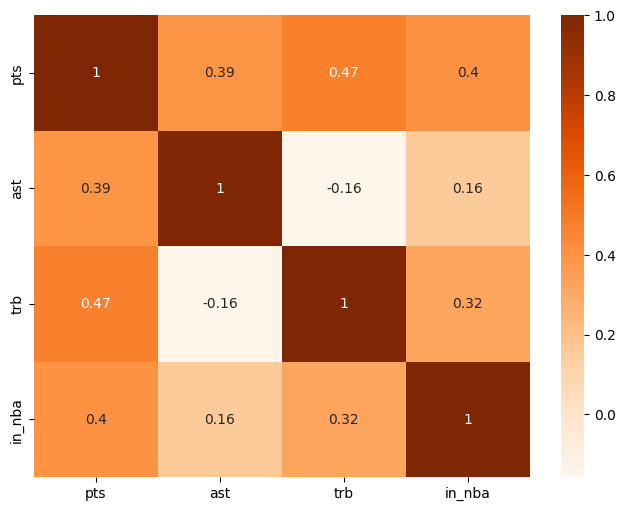

In [955]:
plt.figure(figsize= (8, 6)).set_facecolor('white')
sns.heatmap(is_in_NBA_df.corr(), annot = True, cmap = 'Oranges')

I'm mainly looking at the last column and its correlations with the three statistical categories. Looks like making it to the NBA has stronger correlations with scoring and rebounding over assists.

## Moving on to NBA data

My idea is to classify NBA players into three categories:

• little to no impact

• some impact

• high impact

Something I'll use to help me classify these players is through a composite impact score. Something similar to PER (Player Efficiency Rating) but only takes into account ppg, apg and rpg. 

### **Composite Metric Formula**

impact score = ppg + 2(apg) + rpg


### Why weigh the stats differently?
The weights  reflect the relative importance of each stat to a player’s total impact:

#### ppg:
- Scoring is the most direct measure of a player's contribution. Without points, a team can’t win.

- **Weight**: Won't have weight since it already represents direct impact.

#### apg:
- Assists create scoring opportunities. Each assist typically leads to a basket worth 2 or 3 points. 

- **Weight**: Will be weighted as 2 since it creates scoring opportunities for other players


#### rpg:
- Rebounds affect possessions:

  • **Offensive rebounds**: Lead to second-chance scoring opportunities.
  
  • **Defensive rebounds**: Prevent the opposing team from second-chance scoring opportunities.
  
- **Weight**: No weight as their contribution is less direct than assists or points.



#### **Player Example**:

- Player A: (25ppg, 5apg, 10rpg)

Impact Score = 25 + 2(5) + 10 = 45

  • Player B: (20ppg, 8apg, 8rpg)

Impact Score = 20 + 2(8) + 8 = 44


**Interpretation**: Player A’s scoring and rebounding balance narrowly edges out Player B’s playmaking focus.

In [956]:
NBA_career_avg_df

,player,pts,ast,trb,mp,g
0,Luka Dončić,27.70,8.02,8.58,34.34,66.00
1,Kevin Durant,27.31,4.43,7.01,36.17,60.76
2,LeBron James,27.20,7.34,7.54,37.83,71.05
3,Joel Embiid,26.54,3.31,10.93,31.20,56.29
4,Kobe Bryant,26.06,5.16,5.43,37.04,66.57
...,...,...,...,...,...,...
2133,AJ Guyton,0.00,1.00,0.00,4.50,2.00
2134,Donny Marshall,0.00,0.00,1.00,2.00,3.00
2135,Feron Hunt,0.00,0.50,0.50,4.00,2.00
2136,Trey McKinney-Jones,0.00,0.00,0.00,1.00,1.00


In [957]:
NBA_career_avg_df['ast']*2

0       16.04
1        8.86
2       14.68
3        6.62
4       10.32
        ...  
2133     2.00
2134     0.00
2135     1.00
2136     0.00
2137     0.60
Name: ast, Length: 2138, dtype: float64

In [958]:
NBA_career_avg_df['impact_score'] = NBA_career_avg_df['pts'] + (2 * NBA_career_avg_df['ast']) + NBA_career_avg_df['trb']

In [959]:
NBA_career_avg_df

,player,pts,ast,trb,mp,g,impact_score
0,Luka Dončić,27.70,8.02,8.58,34.34,66.00,52.32
1,Kevin Durant,27.31,4.43,7.01,36.17,60.76,43.18
2,LeBron James,27.20,7.34,7.54,37.83,71.05,49.42
3,Joel Embiid,26.54,3.31,10.93,31.20,56.29,44.09
4,Kobe Bryant,26.06,5.16,5.43,37.04,66.57,41.81
...,...,...,...,...,...,...,...
2133,AJ Guyton,0.00,1.00,0.00,4.50,2.00,2.00
2134,Donny Marshall,0.00,0.00,1.00,2.00,3.00,1.00
2135,Feron Hunt,0.00,0.50,0.50,4.00,2.00,1.50
2136,Trey McKinney-Jones,0.00,0.00,0.00,1.00,1.00,0.00


In [960]:
NBA_career_avg_df_impact = NBA_career_avg_df

In [961]:
NBA_career_avg_df_impact.describe()

,pts,ast,trb,mp,g,impact_score
count,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000
mean,5.955407,1.335140,2.689018,15.594046,35.952633,11.314705
std,4.661069,1.368549,1.906804,8.339757,21.299725,8.171977
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.700000,0.450000,1.350000,9.000000,15.500000,5.400000
50%,4.715000,0.900000,2.260000,14.500000,38.000000,9.400000
75%,7.810000,1.737500,3.550000,21.022500,53.397500,14.820000
max,27.700000,9.670000,12.190000,43.500000,82.000000,52.320000


Since my percentiles are based on solely raw stats, my dataset is skewing towards overrepresenting low minute players who have lower averages. 

Therefore I'll be using per 36 min statistics instead of raw career averages. The 36-minute standard is widely used in basketball analytics because it normalizes stats to reflect a player’s performance over a typical full game. NBA games are 48 minutes long, but starters usually play around 36 minutes per game, making it a practical benchmark.This ensures fair comparisons between high-minute and low-minute players by projecting their contributions over equal playing time.

This means I need to readjust impact scores as well

In [962]:
# Calculate per-36-minute stats
NBA_career_avg_df_impact['ppg_36'] = (NBA_career_avg_df_impact['pts'] / NBA_career_avg_df_impact['mp']) * 36
NBA_career_avg_df_impact['apg_36'] = (NBA_career_avg_df_impact['ast'] / NBA_career_avg_df_impact['mp']) * 36
NBA_career_avg_df_impact['rpg_36'] = (NBA_career_avg_df_impact['trb'] / NBA_career_avg_df_impact['mp']) * 36

# Drop players with zero minutes to avoid division by zero
NBA_career_avg_df_impact = NBA_career_avg_df_impact[NBA_career_avg_df_impact['mp'] > 0]

NBA_career_avg_df_impact['ppg_36'] = NBA_career_avg_df_impact['ppg_36'].round(2)
NBA_career_avg_df_impact['apg_36'] = NBA_career_avg_df_impact['apg_36'].round(2)
NBA_career_avg_df_impact['rpg_36'] = NBA_career_avg_df_impact['rpg_36'].round(2)


/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_7918/3394350127.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_career_avg_df_impact['ppg_36'] = NBA_career_avg_df_impact['ppg_36'].round(2)
/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_7918/3394350127.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_career_avg_df_impact['apg_36'] = NBA_career_avg_df_impact['apg_36'].round(2)
/var/folders/_6/yfw0v_fd27l4wlzfqpq38b7m0000gn/T/ipykernel_7918/3394350127.py:11: SettingWithCo

In [963]:
NBA_career_avg_df_impact = NBA_career_avg_df_impact.drop('impact_score', axis = 1)

In [964]:
NBA_career_avg_df_impact['impact_score'] = NBA_career_avg_df_impact['ppg_36'] + (2 * NBA_career_avg_df_impact['apg_36']) + NBA_career_avg_df_impact['rpg_36']

In [965]:
NBA_career_avg_df_impact.sort_values('impact_score', ascending=False)

,player,pts,ast,trb,mp,g,ppg_36,apg_36,rpg_36,impact_score
1775,Steven Hill,2.0,0.00,3.00,2.00,1.0,36.00,0.00,54.00,90.00
1793,Ahmad Caver,2.0,0.00,0.00,1.00,1.0,72.00,0.00,0.00,72.00
1861,Trevon Duval,1.7,0.70,0.30,2.00,3.0,30.60,12.60,5.40,61.20
2051,Sim Bhullar,0.7,0.30,0.30,1.00,3.0,25.20,10.80,10.80,57.60
0,Luka Dončić,27.7,8.02,8.58,34.34,66.0,29.04,8.41,8.99,54.85
...,...,...,...,...,...,...,...,...,...,...
2088,Greg Whittington,0.0,0.00,0.00,3.00,4.0,0.00,0.00,0.00,0.00
2089,Slavko Vraneš,0.0,0.00,0.00,3.00,1.0,0.00,0.00,0.00,0.00
2099,DeJon Jarreau,0.0,0.00,0.00,1.00,1.0,0.00,0.00,0.00,0.00
2098,Ashton Hagans,0.0,0.00,0.00,2.00,2.0,0.00,0.00,0.00,0.00


In [966]:
NBA_career_avg_df_impact['g'].describe()

count    2136.000000
mean       35.985360
std        21.282805
min         1.000000
25%        15.500000
50%        38.000000
75%        53.410000
max        82.000000
Name: g, dtype: float64

In [967]:
''' 
I'm segmenting players that averaged more than 15 games so that I get rid of players
that only had one off performances. 
'''
NBA_career_avg_df_impact = NBA_career_avg_df_impact[NBA_career_avg_df_impact['g'] > 15]

<Axes: xlabel='player', ylabel='impact_score'>

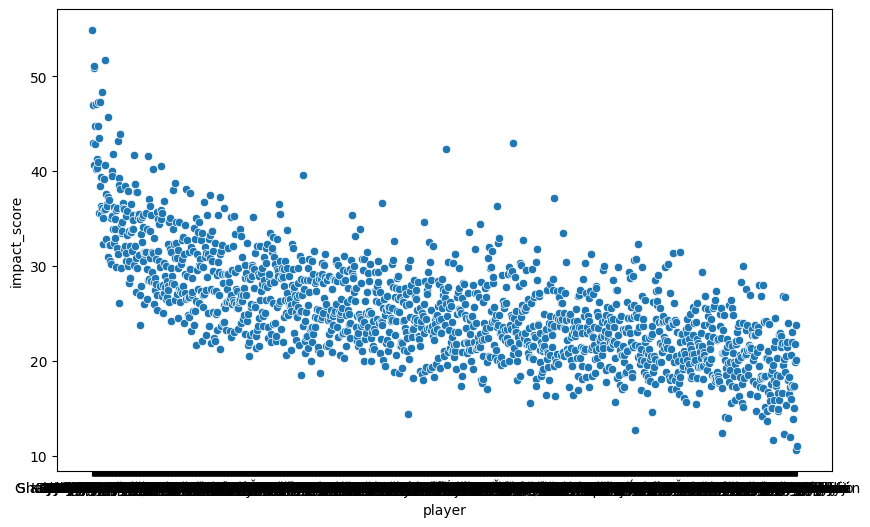

In [968]:
plt.figure(figsize=(10, 6)).set_facecolor('white')

sns.scatterplot(data = NBA_career_avg_df_impact, x = 'player', y = 'impact_score')

Now I want to find how to categorize my players. My current idea is 4 categories:

Low Impact

Medium Impact

High Impact

Elite Impact

I need to figure out exactly how to justify the cutoffs for each caliber of player. I thought that I could easily use the percentiles but after much cleaning, I can see that the majority of players have an impact score around 20-30. There are also outliers like Luka, LeBron, Kevin Durant that I shouldn't cut off. So my cutoffs need to be more nuanced.

<Axes: ylabel='impact_score'>

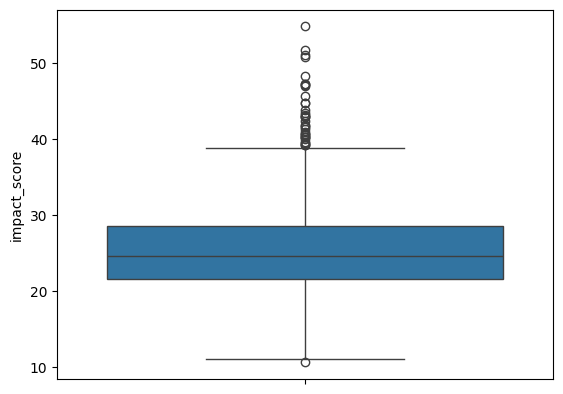

In [969]:
sns.boxplot(data = NBA_career_avg_df_impact, y = 'impact_score')

<Axes: xlabel='impact_score', ylabel='Count'>

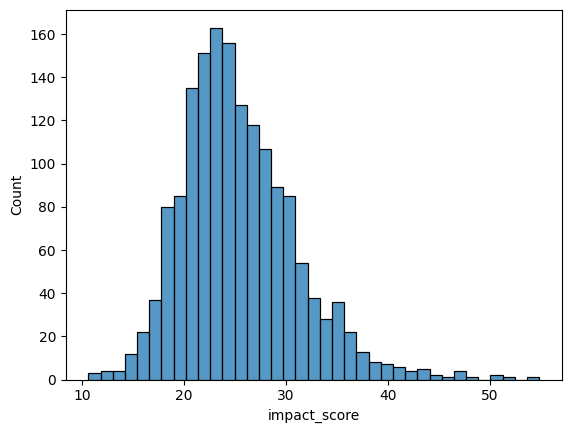

In [970]:
sns.histplot(data = NBA_career_avg_df_impact, x = 'impact_score')

In [971]:
NBA_career_avg_df_impact_cluster = NBA_career_avg_df_impact

In [972]:
'''
Let me attempt justifying each caliber through k-means clustering. I'm setting the number 
of clusters to 4, since I want 4 calibers of player. 
'''

from sklearn.cluster import KMeans

impact_scores = NBA_career_avg_df_impact_cluster[['impact_score']]

kmeans = KMeans(n_clusters = 4, random_state = 42)

NBA_career_avg_df_impact_cluster['cluster'] = kmeans.fit_predict(impact_scores)

print("Cluster Centers (Mean Impact Scores):")
print(kmeans.cluster_centers_)

Cluster Centers (Mean Impact Scores):
[[29.7496729 ]
 [24.25256369]
 [19.30375286]
 [38.33618644]]


/Users/siegfriedhaaan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


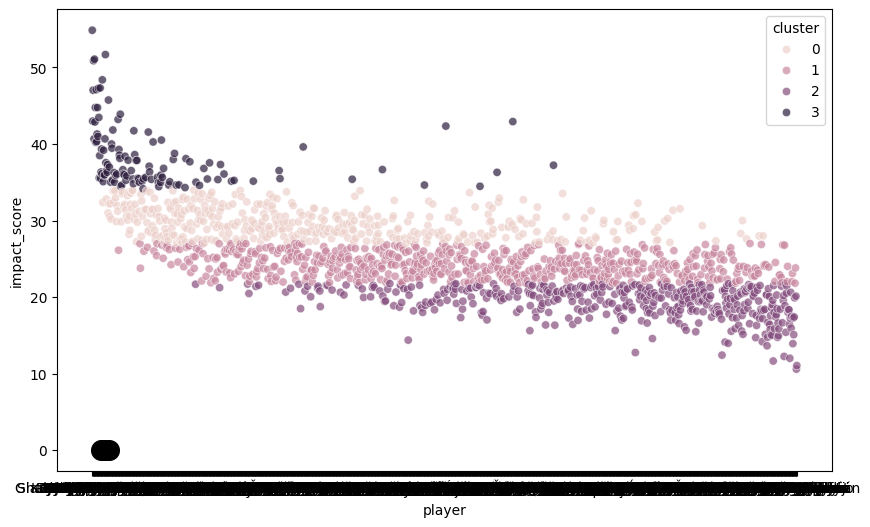

In [973]:
plt.figure(figsize = (10, 6)).set_facecolor('white')

sns.scatterplot(x = NBA_career_avg_df_impact_cluster['player'],
                y= NBA_career_avg_df_impact_cluster['impact_score'],
                hue = NBA_career_avg_df_impact_cluster['cluster'],
                alpha=0.7)

for centroid in kmeans.cluster_centers_:
    plt.scatter(centroid, 0, color = 'black', s = 200, label = 'cluster centroid')

plt.show()

In [985]:
NBA_career_avg_df_impact_cluster[NBA_career_avg_df_impact_cluster['cluster'] == 0]

,player,pts,ast,trb,mp,g,ppg_36,apg_36,rpg_36,impact_score,cluster,impact_score_raw
0,Luka Dončić,27.70,8.02,8.58,34.34,66.00,29.04,8.41,8.99,54.85,0,52.32
1,Kevin Durant,27.31,4.43,7.01,36.17,60.76,27.18,4.41,6.98,42.98,0,43.18
2,LeBron James,27.20,7.34,7.54,37.83,71.05,25.88,6.98,7.18,47.02,0,49.42
3,Joel Embiid,26.54,3.31,10.93,31.20,56.29,30.62,3.82,12.61,50.87,0,44.09
4,Kobe Bryant,26.06,5.16,5.43,37.04,66.57,25.33,5.02,5.28,40.65,0,41.81
...,...,...,...,...,...,...,...,...,...,...,...,...
265,Jason Kidd,11.25,8.37,6.33,34.89,69.08,11.61,8.64,6.53,35.42,0,34.32
297,John Stockton,10.80,7.70,2.50,27.70,82.00,14.04,10.01,3.25,37.31,0,28.70
305,Ricky Rubio,10.67,7.28,4.08,29.26,58.17,13.13,8.96,5.02,36.07,0,29.31
433,Rajon Rondo,8.74,7.37,4.30,27.38,50.41,11.49,9.69,5.65,36.52,0,27.78


In [975]:
NBA_career_avg_df_impact['impact_score_raw'] = NBA_career_avg_df_impact['pts'] + (2 * NBA_career_avg_df_impact['ast']) + NBA_career_avg_df_impact['trb']

In [976]:
NBA_career_avg_df_impact_cluster_raw = NBA_career_avg_df_impact

In [980]:
'''
Let me attempt justifying each caliber through k-means clustering. I'm setting the number 
of clusters to 4, since I want 4 calibers of player. 
'''

from sklearn.cluster import KMeans

impact_scores_raw = NBA_career_avg_df_impact_cluster_raw[['impact_score_raw']]

kmeans_raw = KMeans(n_clusters = 4, random_state = 42)

NBA_career_avg_df_impact_cluster_raw['cluster'] = kmeans_raw.fit_predict(impact_scores_raw)

print("Cluster Centers (RAW Mean Impact Scores):")
print(kmeans_raw.cluster_centers_)

Cluster Centers (RAW Mean Impact Scores):
[[33.28447154]
 [12.70975439]
 [20.98307432]
 [ 6.44971061]]


/Users/siegfriedhaaan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [987]:
NBA_career_avg_df_impact_cluster[NBA_career_avg_df_impact_cluster['cluster'] == 0]['player'].unique()

array(['Luka Dončić', 'Kevin Durant', 'LeBron James', 'Joel Embiid',
       'Kobe Bryant', 'Trae Young', 'Damian Lillard', 'Zion Williamson',
       'Donovan Mitchell', 'James Harden', 'Devin Booker', 'Kyrie Irving',
       'Stephen Curry', 'Anthony Davis', 'Giannis Antetokounmpo',
       'Karl-Anthony Towns', 'Allen Iverson', 'Jayson Tatum', 'Ja Morant',
       'Carmelo Anthony', 'Bradley Beal', 'Shai Gilgeous-Alexander',
       'Anthony Edwards', 'Russell Westbrook', 'Jamal Mashburn',
       'DeMar DeRozan', 'Dwyane Wade', 'Dirk Nowitzki', 'Zach LaVine',
       "De'Aaron Fox", 'Nikola Jokić', 'Kristaps Porziņģis',
       'Michael Jordan', 'Paolo Banchero', 'Brandon Ingram',
       'Paul George', 'Klay Thompson', 'LaMelo Ball', 'Jalen Green',
       'Kawhi Leonard', 'Andrew Wiggins', 'Chris Bosh', 'CJ McCollum',
       'Ray Allen', "D'Angelo Russell", 'Cade Cunningham', 'Yao Ming',
       'John Wall', 'Jaylen Brown', 'Collin Sexton', 'Darius Garland',
       'Jimmy Butler', 'Paul Pier

In [986]:
NBA_career_avg_df_impact_cluster_raw[NBA_career_avg_df_impact_cluster_raw['cluster'] == 0]['player'].unique()

array(['Luka Dončić', 'Kevin Durant', 'LeBron James', 'Joel Embiid',
       'Kobe Bryant', 'Trae Young', 'Damian Lillard', 'Zion Williamson',
       'Donovan Mitchell', 'James Harden', 'Devin Booker', 'Kyrie Irving',
       'Stephen Curry', 'Anthony Davis', 'Giannis Antetokounmpo',
       'Karl-Anthony Towns', 'Allen Iverson', 'Jayson Tatum', 'Ja Morant',
       'Carmelo Anthony', 'Bradley Beal', 'Shai Gilgeous-Alexander',
       'Anthony Edwards', 'Russell Westbrook', 'Jamal Mashburn',
       'DeMar DeRozan', 'Dwyane Wade', 'Dirk Nowitzki', 'Zach LaVine',
       "De'Aaron Fox", 'Nikola Jokić', 'Kristaps Porziņģis',
       'Michael Jordan', 'Paolo Banchero', 'Brandon Ingram',
       'Paul George', 'Klay Thompson', 'LaMelo Ball', 'Jalen Green',
       'Kawhi Leonard', 'Andrew Wiggins', 'Chris Bosh', 'CJ McCollum',
       'Ray Allen', "D'Angelo Russell", 'Cade Cunningham', 'Yao Ming',
       'John Wall', 'Jaylen Brown', 'Collin Sexton', 'Darius Garland',
       'Jimmy Butler', 'Paul Pier

In [978]:
first_four_seasons_df = pd.read_csv('first_four_seasons.csv', index_col= 0).reset_index(drop = True)

I'm thinking a feature that could be introduced to the product would be an archetype comparison. When there's an output of 4 years worth of stats, we could take the 4th year and find the 3 players closest to that line of production. Then we take those 3 players and say "the prospect you have entered will have a similar impact as these 3 players: ... on year 4". Very reminiscent of the feature on NBA 2k for when right you finish your 'myplayer', there's a comparison with the player you created and 3 players the game deems similar

In [979]:
first_four_seasons_df

,player,age,team,pos,pts,ast,trb,orb,drb,stl,...,g,mp,fg,fga,fg%,efg%,ft,fta,ft%,year
0,A.J. Green,23.0,MIL,SG,4.4,0.6,1.3,0.2,1.1,0.2,...,35.0,9.9,1.5,3.6,0.424,0.600,0.1,0.1,1.000,2023
1,A.J. Guyton,24.0,GSW,PG,0.0,1.0,0.0,0.0,0.0,0.5,...,2.0,4.5,0.0,2.0,0.000,0.000,0.0,0.0,NaN,2003
2,A.J. Hammons,24.0,DAL,C,2.2,0.2,1.6,0.4,1.3,0.0,...,22.0,7.4,0.8,1.9,0.405,0.464,0.4,0.9,0.450,2017
3,A.J. Lawson,22.0,2TM,SG,3.7,0.1,1.4,0.4,1.0,0.1,...,15.0,7.2,1.5,2.9,0.500,0.614,0.1,0.5,0.250,2023
4,A.J. Lawson,22.0,MIN,SG,2.0,0.0,1.0,0.0,1.0,0.0,...,1.0,2.0,1.0,1.0,1.000,1.000,0.0,0.0,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6465,Žarko Čabarkapa,23.0,GSW,PF,6.2,0.7,2.7,0.9,1.8,0.3,...,37.0,12.5,2.2,4.6,0.482,0.521,1.4,1.7,0.813,2005
6466,Željko Rebrača,30.0,DET,C,6.6,0.3,3.1,0.9,2.2,0.2,...,30.0,16.3,2.7,4.8,0.552,0.552,1.3,1.6,0.792,2003
6467,Željko Rebrača,31.0,2TM,C,3.8,0.3,2.4,1.0,1.5,0.2,...,24.0,11.4,1.4,3.2,0.442,0.442,1.0,1.3,0.767,2004
6468,Željko Rebrača,31.0,DET,C,3.1,0.2,2.3,0.9,1.4,0.2,...,21.0,10.6,1.0,2.6,0.407,0.407,1.0,1.3,0.786,2004
